In [23]:
import pandas as pd
import numpy as np 
df = pd.read_csv('adult.data',names =['age','workclass','fnlgwt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Get >50k'] )  # read data
df.info()   # show type each colums
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlgwt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Get >50k        32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlgwt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Get >50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [24]:
a=df.values
X=a[:,:-1]   
y=a[:,-1]
print(X[1])
print(y)

[50 ' Self-emp-not-inc' 83311 ' Bachelors' 13 ' Married-civ-spouse'
 ' Exec-managerial' ' Husband' ' White' ' Male' 0 0 13 ' United-States']
[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


In [46]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
X[:,1]= LE.fit_transform(X[:,1])
X[:,3]= LE.fit_transform(X[:,3])
X[:,5]= LE.fit_transform(X[:,5])
X[:,6]= LE.fit_transform(X[:,6])
X[:,7]= LE.fit_transform(X[:,7])
X[:,8]= LE.fit_transform(X[:,8])
X[:,9]= LE.fit_transform(X[:,9])
X[:,13]= LE.fit_transform(X[:,13])
y= LE.fit_transform(y)


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


(26048,)


In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([Dense(32, activation='tanh', input_dim=14),
                    Dense(32, activation='tanh'),  
                    Dense(1, activation='tanh'),])
# structure neural network : input 14 , hidden layer 1 ( size 32),hidden 2 ( size 32) , output 


model.compile(optimizer='adam',  # stochastic gradient descent, với multip-class classification nên dùng 
              loss='mean_squared_error',   
              metrics=['accuracy'])
         #dung binary_crossentropy thi ra loss nAN
X_train=np.asarray(X_train).astype(np.float64)   # chuyen thanh float tranh loi 
y_train=np.asarray(y_train).astype(np.float64) 
X_test=np.asarray(X_test).astype(np.float64) 
y_test=np.asarray(y_test).astype(np.float64) 


print(X_train.shape)
# Một Epoch được tính là khi chúng ta đưa tất cả dữ liệu vào mạng neural network 1 lần. đem toàn bộ dữ liệu qua mạng một vài lần để tìm được kết quả tối ưu
# Batch_size là số lượng mẫu dữ liệu trong một batch  
# => có 26048 tập dữ liệu mẫu , batch_size = 50 => iterations 521 ( số lượng batch cần để hoàn thành 1 epoch)

hist = model.fit(X_train, y_train, epochs=50,batch_size=50,validation_data=(X_test, y_test))

(26048, 14)
Epoch 1/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1803 - accuracy: 0.7685 - val_loss: 0.1755 - val_accuracy: 0.7729
Epoch 2/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1815 - accuracy: 0.7657 - val_loss: 0.1802 - val_accuracy: 0.7663
Epoch 3/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1827 - accuracy: 0.7616 - val_loss: 0.1776 - val_accuracy: 0.7706
Epoch 4/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1833 - accuracy: 0.7621 - val_loss: 0.1823 - val_accuracy: 0.7663
Epoch 5/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1837 - accuracy: 0.7611 - val_loss: 0.1789 - val_accuracy: 0.7663 loss: 0.1831 - accuracy: 
Epoch 6/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1831 - accuracy: 0.7611 - val_loss: 0.1788 - val_accuracy: 0.7663
Epoch 7/50
521/521 [==============================] - 1s 1ms/step - loss: 0.1832 - accuracy: 0.7610 - val_loss

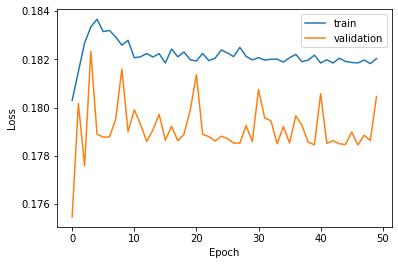

In [96]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.epoch, np.array(hist.history['loss']), label='loss')
plt.plot(hist.epoch, np.array(hist.history['val_loss']), label = 'Val loss')
plt.legend(['train', 'validation'], loc='upper right')